In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
os

<module 'os' from 'C:\\Users\\GLADYS\\anaconda3\\lib\\os.py'>

In [7]:
dataset=pd.read_excel(r"C:\Users\GLADYS\Downloads\HousePricePrediction.xlsx")
dataset

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [8]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [9]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [10]:
dataset.shape

(2919, 13)

In [11]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

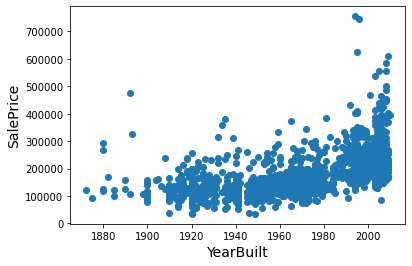

In [12]:
plt.scatter(dataset['YearBuilt'],dataset['SalePrice'])
plt.xlabel('YearBuilt',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.show()

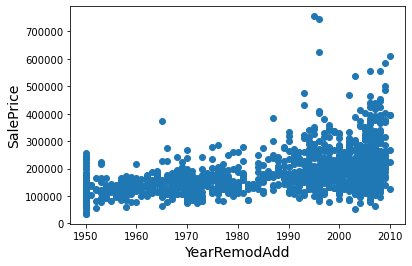

In [13]:
plt.scatter(dataset['YearRemodAdd'],dataset['SalePrice'])
plt.xlabel('YearRemodAdd',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.show()

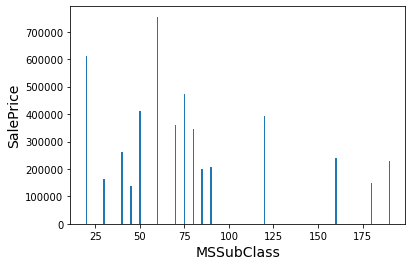

In [14]:
plt.bar(dataset['MSSubClass'],dataset['SalePrice'])
plt.xlabel('MSSubClass',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.show()

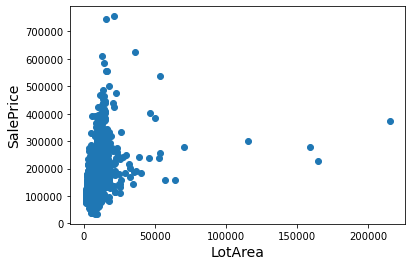

In [15]:
plt.scatter(dataset['LotArea'],dataset['SalePrice'])
plt.xlabel('LotArea',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.show()

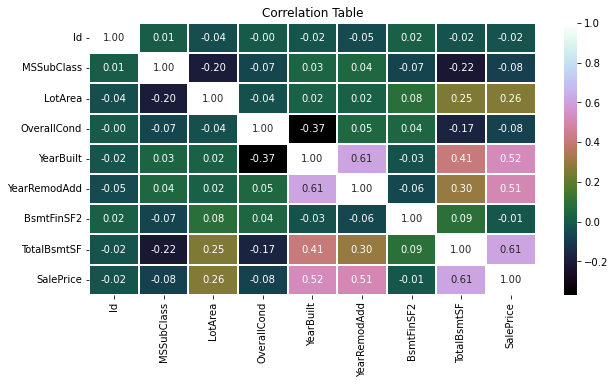

In [16]:
plt.figure(figsize=(10,5))
sb.heatmap(dataset.corr(),cmap='cubehelix',fmt='.2f',linewidths=2,annot=True)
plt.title("Correlation Table")
plt.show()

In [17]:
mean_sale_price = dataset['SalePrice'].mean()
dataset['SalePrice'].fillna(mean_sale_price,inplace=True)


In [18]:
mdataset = dataset.dropna()


In [19]:
mdataset.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
 
s = (mdataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [24]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(mdataset[object_cols]))
OH_cols.index = mdataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
smdataset = mdataset.drop(object_cols, axis=1)
smdataset = pd.concat([smdataset, OH_cols], axis=1)

In [25]:
x=smdataset.drop(['SalePrice'],axis=1)
y=smdataset['SalePrice']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
LiRe=LinearRegression()
LiRe.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict=LiRe.predict(x_test)
print(y_predict)
print(y_test)

[226288.88992179 181697.51833744 190940.73341665 195503.19404069
 183033.92774973 192176.81217403 208788.43224391 232017.24587715
 145870.04576632 190517.9379908  209349.87613751 187339.88433649
 212189.36722813 211129.41816332 196360.1834005  201993.0624039
 159187.85833197 199330.8041785  139663.55312623 153029.47768896
 174239.73520968 213982.31674074 195735.36808806 171109.21307807
 284851.46841295 186871.22018688 208547.58302824 230883.43763157
 208024.99453443 171175.10401082 171420.41543826 143408.30117561
 203014.05526353 167180.55001082 204632.26658558 160792.40977608
 153264.98058816 192983.93025172 164796.80469658 173848.89438833
 167468.70640377 203082.74751672 185966.16015725 221307.96632601
 144855.78096407 170403.39722721 169236.95121623 228135.23886038
 168967.76178762 194782.52885784 218693.93723932 204647.08074987
 200201.56630644 250344.50669458 218271.98287204 217447.65314178
 164578.27458305 207655.45559567 184970.73296223 134598.51737979
 200563.41056948 138350.55